# 데이터 준비준비

In [ ]:
## 1번 실행 -> 런타임 다시 시작 -> 2번 실행 -> 3번 실행

## 1번

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,523 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and dire

In [ ]:
## 2번

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

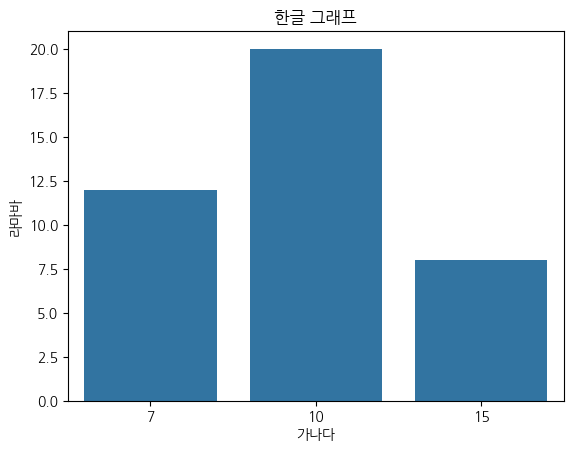

In [ ]:
## 3번

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 나눔고딕 폰트 경로 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
plt.rc('font', family=font_name)

# 그래프 그리기 예시
data = {'가나다': [10, 15, 7], '라마바': [20, 8, 12]}
df = pd.DataFrame(data)
sns.barplot(data=df, x='가나다', y='라마바')
plt.title('한글 그래프')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 시작

In [ ]:
# 1차 전처리 후 데이터 불러오기
df = pd.read_pickle('/content/drive/MyDrive/반도체_캐글/LSWMD/df_cleaned_withpattern_캐글 이미지 전처리_ver.02.pkl')


In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25519 entries, 0 to 25518
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               25519 non-null  int64  
 1   waferMap            25519 non-null  object 
 2   dieSize             25519 non-null  float64
 3   lotName             25519 non-null  object 
 4   trianTestLabel      25519 non-null  object 
 5   failureType         25519 non-null  object 
 6   failureNum          25519 non-null  int64  
 7   trainTestNum        25519 non-null  int64  
 8   waferMap_parameter  25519 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 1.8+ MB


,index,waferMap,dieSize,lotName,trianTestLabel,failureType,failureNum,trainTestNum,waferMap_parameter
0,19,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,[[Training]],[[Loc]],5,1,"(45, 48)"
1,36,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,[[Training]],[[Edge-Loc]],3,1,"(53, 58)"
2,37,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,[[Training]],[[Edge-Loc]],3,1,"(53, 58)"
3,38,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,[[Training]],[[Edge-Loc]],3,1,"(53, 58)"
4,39,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,[[Training]],[[Edge-Loc]],3,1,"(53, 58)"


# 일단 불량유형별로 불량(노란색 부분)의 밀도를 확인해보자

In [ ]:
import numpy as np

# 픽셀 값의 빈도수를 저장할 딕셔너리
value_counts_dict = {}

# 각 waferMap에 대해 픽셀 값의 빈도수를 계산
for wafer_map in df['waferMap']:
    unique, counts = np.unique(wafer_map, return_counts=True)
    for value, count in zip(unique, counts):
        if value in value_counts_dict:
            value_counts_dict[value] += count
        else:
            value_counts_dict[value] = count

# 전체 waferMap에서 각 픽셀 값의 빈도수를 출력
for value, count in value_counts_dict.items():
    print(f"Value: {value}, Count: {count}")


Value: 0, Count: 12467876
Value: 1, Count: 38288525
Value: 2, Count: 6125744


In [ ]:
### 이 이미지는 0,1,2로 값이 배정되어있지만 어디가 뭔지 모른다 -> 리사이징 크기는 가장 큰 걸로

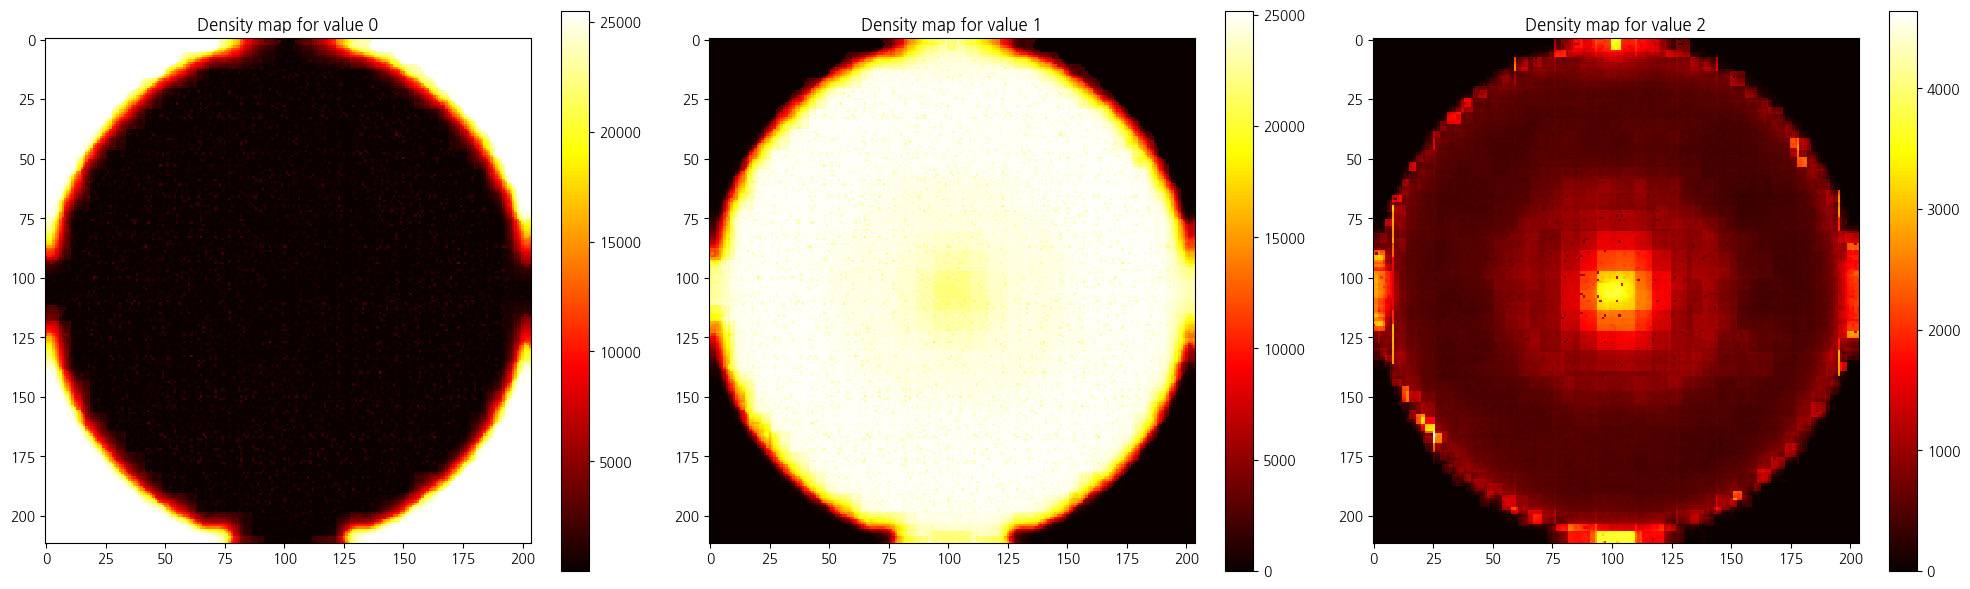

In [ ]:
## value 밀도를 보자

import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize

# 웨이퍼 맵들의 리스트를 가져옴 (가정)
wafer_maps = [np.array(map) for map in df['waferMap']]

# 가장 큰 웨이퍼 맵의 크기를 찾음
max_shape = np.max([m.shape for m in wafer_maps], axis=0)

# 모든 웨이퍼 맵을 같은 크기로 리사이징
resized_maps = [resize(m, max_shape, preserve_range=True, anti_aliasing=True).astype(int) for m in wafer_maps]

# 밀도 맵을 계산할 빈 numpy 배열 생성
density_maps = {0: np.zeros(max_shape, dtype=float),
                1: np.zeros(max_shape, dtype=float),
                2: np.zeros(max_shape, dtype=float)}

# 각 리사이즈된 웨이퍼맵에서 0, 1, 2의 분포를 더함
for wafer_map in resized_maps:
    for value in density_maps.keys():
        density_maps[value] += (wafer_map == value)

# 0, 1, 2 각각의 밀도 맵을 시각화
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
for value, ax in zip(density_maps.keys(), axes):
    heatmap = ax.imshow(density_maps[value], cmap='hot', interpolation='nearest')
    ax.set_title(f'Density map for value {value}')
    plt.colorbar(heatmap, ax=ax)
plt.tight_layout()
plt.show()


In [ ]:
print(max_shape)


# 0은 보라색 1은 초록색 2는 노란색(불량)

#

[212 204]


In [ ]:
import pandas as pd

# 먼저 데이터의 형태를 출력하여 확인합니다.
print(df['failureType'].apply(type).unique())

# 데이터를 문자열로 변환합니다.
df['failureType_str'] = df['failureType'].apply(lambda x: str(x))

# 문자열로 변환된 열에서 고유값을 구합니다.
defect_types = df['failureType_str'].unique()

print(defect_types)


[<class 'numpy.ndarray'>]
["[['Loc']]" "[['Edge-Loc']]" "[['Center']]" "[['Edge-Ring']]"
 "[['Scratch']]" "[['Random']]" "[['Near-full']]" "[['Donut']]"]


In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25519 entries, 0 to 25518
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               25519 non-null  int64  
 1   waferMap            25519 non-null  object 
 2   dieSize             25519 non-null  float64
 3   lotName             25519 non-null  object 
 4   trianTestLabel      25519 non-null  object 
 5   failureType         25519 non-null  object 
 6   failureNum          25519 non-null  int64  
 7   trainTestNum        25519 non-null  int64  
 8   waferMap_parameter  25519 non-null  object 
 9   failureType_tuple   25519 non-null  object 
 10  failureType_str     25519 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 2.1+ MB


,index,waferMap,dieSize,lotName,trianTestLabel,failureType,failureNum,trainTestNum,waferMap_parameter,failureType_tuple,failureType_str
0,19,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,[[Training]],[[Loc]],5,1,"(45, 48)","([Loc],)",[['Loc']]
1,36,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,[[Training]],[[Edge-Loc]],3,1,"(53, 58)","([Edge-Loc],)",[['Edge-Loc']]
2,37,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,[[Training]],[[Edge-Loc]],3,1,"(53, 58)","([Edge-Loc],)",[['Edge-Loc']]
3,38,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,[[Training]],[[Edge-Loc]],3,1,"(53, 58)","([Edge-Loc],)",[['Edge-Loc']]
4,39,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,[[Training]],[[Edge-Loc]],3,1,"(53, 58)","([Edge-Loc],)",[['Edge-Loc']]


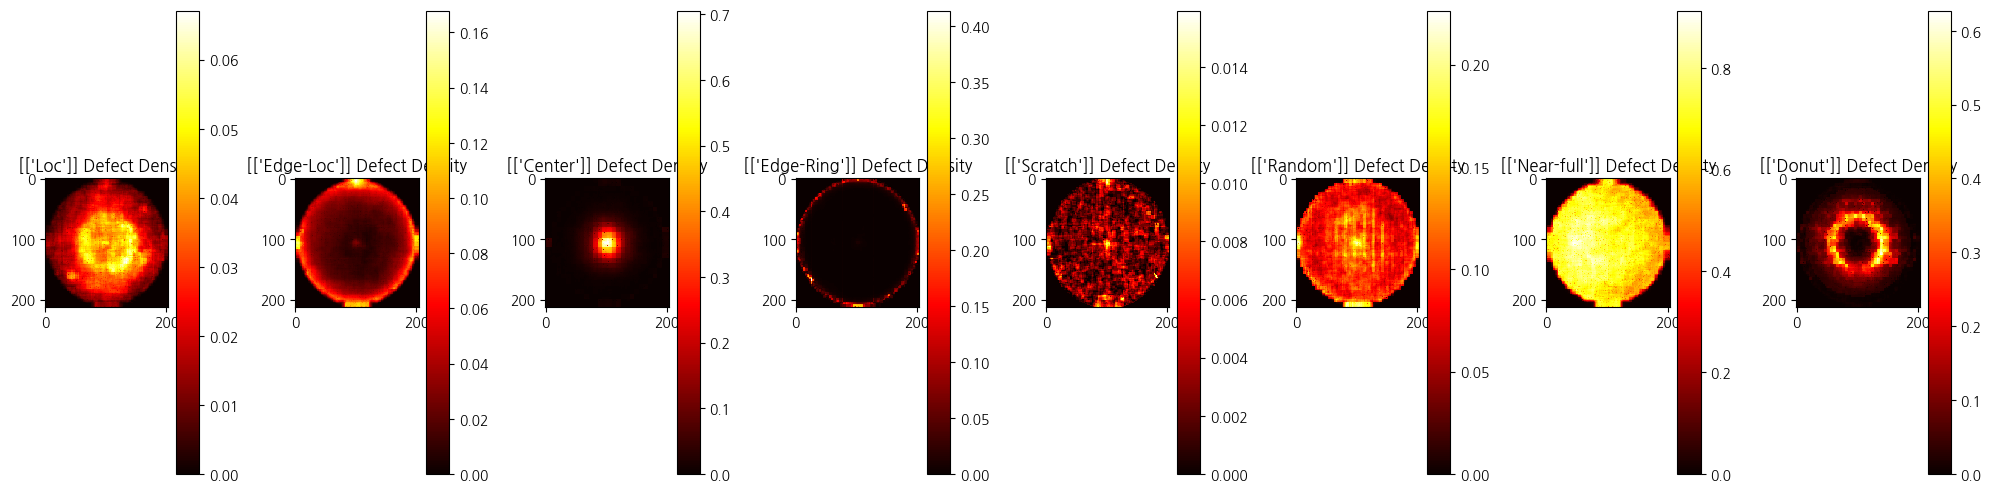

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize

# 웨이퍼 맵 데이터를 로드 (예제 코드에서는 가정으로 진행)
wafer_maps = [np.array(map) for map in df['waferMap']]

# 가장 큰 웨이퍼 맵의 크기를 찾음
max_shape = np.max([m.shape for m in wafer_maps], axis=0)

# 불량 유형을 문자열로 저장된 'failureType_str'에서 사용
defect_types = df['failureType_str'].unique()

# 밀도 맵을 저장할 딕셔너리 초기화
density_maps = {defect: np.zeros(max_shape, dtype=float) for defect in defect_types}

# 각 웨이퍼맵을 순회하며 밀도 계산
for defect in defect_types:
    # 해당 불량 유형의 웨이퍼맵만 선택
    defect_maps = df[df['failureType_str'] == defect]['waferMap']
    count_maps = np.zeros(max_shape, dtype=float)  # 각 웨이퍼맵의 크기 조정 및 카운팅을 위한 임시 배열

    for wafer_map in defect_maps:
        # 리사이징된 맵에서 값이 2인 픽셀만 카운트
        resized_map = resize(wafer_map, max_shape, preserve_range=True, anti_aliasing=True)
        count_maps += (resized_map == 2)

    # 각 유형의 밀도를 해당 웨이퍼맵 개수로 나누어 평균 밀도를 얻음
    density_maps[defect] = count_maps / len(defect_maps)

# 밀도 맵 시각화
fig, axes = plt.subplots(1, len(defect_types), figsize=(20, 6))
for ax, (defect, density_map) in zip(axes, density_maps.items()):
    heatmap = ax.imshow(density_map, cmap='hot', interpolation='nearest')
    ax.set_title(f"{defect} Defect Density")
    plt.colorbar(heatmap, ax=ax)

plt.tight_layout()
plt.show()


# 다른 데이터

In [ ]:
# 1차 전처리 후 데이터 불러오기
df1 = pd.read_pickle('/content/drive/MyDrive/반도체_캐글/LSWMD/df_cleaned_withlabel_캐글 이미지 전처리_ver.02.pkl')

df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172950 entries, 0 to 172949
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               172950 non-null  int64  
 1   waferMap            172950 non-null  object 
 2   dieSize             172950 non-null  float64
 3   lotName             172950 non-null  object 
 4   trianTestLabel      172950 non-null  object 
 5   failureType         172950 non-null  object 
 6   failureNum          172950 non-null  int64  
 7   trainTestNum        172950 non-null  int64  
 8   waferMap_parameter  172950 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 11.9+ MB


,index,waferMap,dieSize,lotName,trianTestLabel,failureType,failureNum,trainTestNum,waferMap_parameter
0,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,[[Training]],[[none]],9,1,"(45, 48)"
1,1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,[[Training]],[[none]],9,1,"(45, 48)"
2,2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,[[Training]],[[none]],9,1,"(45, 48)"
3,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,[[Training]],[[none]],9,1,"(45, 48)"
4,4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,[[Training]],[[none]],9,1,"(45, 48)"


In [ ]:
df1.tail()

,index,waferMap,dieSize,lotName,trianTestLabel,failureType,failureNum,trainTestNum,waferMap_parameter
172945,811450,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,...",600.0,lot47542,[[Test]],[[Edge-Loc]],3,2,"(26, 30)"
172946,811451,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47542,[[Test]],[[Edge-Loc]],3,2,"(26, 30)"
172947,811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,[[Test]],[[Edge-Ring]],4,2,"(26, 30)"
172948,811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,[[Test]],[[Edge-Loc]],3,2,"(26, 30)"
172949,811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,[[Test]],[[Edge-Ring]],4,2,"(26, 30)"


In [ ]:
import numpy as np

# 픽셀 값의 빈도수를 저장할 딕셔너리
value_counts_dict = {}

# 각 waferMap에 대해 픽셀 값의 빈도수를 계산
for wafer_map in df1['waferMap']:
    unique, counts = np.unique(wafer_map, return_counts=True)
    for value, count in zip(unique, counts):
        if value in value_counts_dict:
            value_counts_dict[value] += count
        else:
            value_counts_dict[value] = count

# 전체 waferMap에서 각 픽셀 값의 빈도수를 출력
for value, count in value_counts_dict.items():
    print(f"Value: {value}, Count: {count}")

Value: 0, Count: 52331246
Value: 1, Count: 161948275
Value: 2, Count: 18305814
